# Investigate a Dataset on Titanic
### A Udacity Nanodegree Project by Sze-Peng Tan (October 13, 2017)

## Abstract
This project paper has been prepared under Udacity’s Introduction to Data Analysis course. The project calls for the investigation of a dataset on Titanic supplied by Kaggle. 

According to Wikipedia's [Sinking of the RMS Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic), the Titanic was carrying an estimated 2,224 passengers when it set off to New York City from Southampton in April 1912 on its maiden voyage. More than 1,500 people perished in the tragedy, making it one of the deadliest peacetime maritime disaster in history.

This project investigates the provided dataset on Titanic to draw observations about passengers' and survivors' profiles. Statistical metrics and visualization of the data are provided to support the observations. 


### Table of Contents
<ul>
<li><a href="#intro">1 Introduction</a></li>
<li><a href="#wrangling">2 Data Wrangling</a></li>
<li><a href="#eda">3 Exploratory Data Analysis</a>
    <ul>
    <li><a href="#passengers">3.1 Passengers</a></li>
    <li><a href="#pclass">3.2 Survivability based on Pclass</a></li>
    <li><a href="#fares pclass">3.3 Ticket Prices between Pclass</a></li>
    <li><a href="#1st class passengers">3.4 Survivability amongst 1st Class Passengers</a></li>
    <li><a href="#age">3.5 Survivability: Age</a></li>
    <li><a href="#embarked">3.6 Survivability: Boarding Station</a></li>
    </ul>
</li>
<li><a href="#conclusions">4 Conclusions</a></li>
</ul>


<a id='intro'></a>
## 1 Introduction

The [dataset on Titanic](https://www.kaggle.com/c/titanic) was provided by Kaggle. Kaggle describes the tragedy as follows:

*"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.*

*One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class."*

A [data dictionary](https://www.kaggle.com/c/titanic/data) was also supplied. In summary, the dataset contains variables that allows an opportunity to answer the following question: 

"*What factors made people more likely to survive?*"

This project tries to find the answer by analyzing the variables below (*independent variables*) and providing metrices and plots to support observations on if and how these variables affect survivability (*dependent variable*):
1. Pclass (A proxy for socio-economic status)
2. Age
3. Gender
4. Embarkation port



In [1]:
# Set up import statements for all of the packages to use.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## 2 Data Wrangling
In this chapter, the dataset is loaded and checked for cleanliness, trimmed and cleaned as needed for the succeeding analysis.

### 2.1 General Properties

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

# Read in the CSV file.
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

In [3]:
# Inspect data type.
print type(titanic_df)
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observation(s):**   
1. Pandas imported the CSV file as a DataFrame with 12 columns. A printout of 5 rows in the DataFrame reveals the column names and contents of each row.
2. Cells in column `Cabin` cells have `NaN` entries. Perhaps there are missing entries in other columns as well. 

In [4]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

**Observation(s):**   
1. 891 passengers are recorded in the dataset - it contains only a fraction of all passengers onboard the Titanic.
2. Three columns have missing entries (i.e. count of values is < 891): *Age*, *Cabin* and *Embarked*.
3. *Cabin* has the highest missing entries followed by *Age*. 

#### 2.1.1 Quick Glance into Missing Entries in 'Cabin' Column

In [5]:
### Take a quick look at Cabin and see if missing entries are due to ticket class.
# Group DataFrame by Pclass and count entries in PassengerId and Cabin.
df = titanic_df.groupby('Pclass')['PassengerId', 'Cabin'].count()
df['missing_info'] = df['PassengerId'] - df['Cabin']
df

,PassengerId,Cabin,missing_info
Pclass,,,
1,216,176,40
2,184,16,168
3,491,12,479


In [6]:
# Look at a few examples of Cabin entries across each Pclass.
cabin_df = titanic_df[['Pclass', 'Cabin']].dropna()
cabin_df[cabin_df['Pclass']==1].head()

,Pclass,Cabin
1,1,C85
3,1,C123
6,1,E46
11,1,C103
23,1,A6


In [7]:
cabin_df[cabin_df['Pclass']==2]

,Pclass,Cabin
21,2,D56
66,2,F33
123,2,E101
148,2,F2
183,2,F4
193,2,F2
292,2,D
303,2,E101
327,2,D
340,2,F2


In [8]:
cabin_df[cabin_df['Pclass']==3]

,Pclass,Cabin
10,3,G6
75,3,F G73
128,3,F E69
205,3,G6
251,3,G6
394,3,G6
429,3,E10
699,3,F G63
715,3,F G73
751,3,E121


**Observation(s):**   
1. There is no intended association between the missing *Cabin* entries and the *Pclass* types, since it is possible for each *Pclass* to have *Cabin* data.
2. However, each *Pclass* appears to have missing *Cabin* data, with the most pronounce omission of *Cabin* data coming from *Pclass* 3. 
3. The above printouts of *Cabin* entries against each *Pclass* demonstrate that the cabin names across the classes take the same notation of an alphabet followed by numeric digits.
4. Specifically for *Pclass* 3 where most *Cabin* data are missing, there is no cabin name notation to suggest that passengers on this class were housed in common "public" cabins.
5. The `NaN` values in *Cabin* are possibly due to omission of the information, unintentionally or otherwise. 

**Additional Observation(s):** Besides missing data, the *Cabin* column contains errant data:
1. Missing numeric digit(s).
2. Prefixed with another alphabet (e.g. *F G73*).
3. The above errant entries are detected in entries for Pclass 2 and Class 3 data. Other errant entry types could exist in Pclass 1 data.  

#### 2.1.2 Quick Glance into Missing Values in Column 'Age'

In [9]:
### Take a quick look at rows with missing 'Age' data.
df = titanic_df[titanic_df['Age'].isnull()]
print "Count of passengers with missing age data = %i" % df['PassengerId'].count()
df.groupby(['Pclass', 'Sex']).count()

Count of passengers with missing age data = 177


PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex                                                                    
1      female            9         9     9    0      9      9       9     9   
       male             21        21    21    0     21     21      21    21   
2      female            2         2     2    0      2      2       2     2   
       male              9         9     9    0      9      9       9     9   
3      female           42        42    42    0     42     42      42    42   
       male             94        94    94    0     94     94      94    94   

               Cabin  Embarked  
Pclass Sex                      
1      female      5         9  
       male       11        21  
2      female      1         2  
       male        0         9  
3      female      1        42  
       male        1        94

**Observation(s):**   
1. 177 of 891 passengers have missing age data.
2. These missing entries are found across all *Pclass* and gender types.
3. There is no apparent pattern to suggest that the missing age data can be subtituted.
  * It is conceivable that the missing age data is replaced by an arbitrarily value derived from the mean or median of ages from other passengers.
  * Or perhaps filled in using the mean or median ages from the respective genders of other passengers.

### 2.2 Data Cleaning
The independent variables of interest in this project does not include the cabin of the passengers. Hence, no attempt is made to clean up the missing data in *Cabin* column.

On the other hand, *Age* is one of the independent variable to be studied. Looking at the DataFrame in relation to the age data, there is no apparent pattern to suggest the possibility of replacing the missing values with accurate substitutes. Hence, for the succeeding analysis involving age data, only the rows with available age value are considered.

Otherwise, analysis not involving *Age* column proceeds with the given dataset.

In [10]:
# Create a new DataFrame to exclude rows missing age data.
titanic_a = titanic_df[titanic_df['Age'].notnull()]
print titanic_a.shape

(714, 12)


**Observation(s):** The new DataFrame has 714 rows and 12 columns.

<a id='eda'></a>
## 3 Exploratory Data Analysis
<a id='passengers'></a>
### 3.1 Passengers
This chapter explores the metrics on passengers in the dataset.

In [11]:
# Function takes in a column, groups the entries in the column.
# Returns count of entries per group & the percentage of each group against total passengers. 
def percentage_passengers(grpby):
    s = titanic_df.groupby(grpby)['PassengerId'].count()  # Group & count passengers.
    total_passengers = float(s.sum())  # Compute total passengers & converts to float for use as denominator.
    percentage = s.div(total_passengers) * 100
    return s.append(percentage)

In [12]:
print percentage_passengers('Sex')

Sex
female    314.000000
male      577.000000
female     35.241302
male       64.758698
Name: PassengerId, dtype: float64


In [13]:
print percentage_passengers('Pclass')

Pclass
1    216.000000
2    184.000000
3    491.000000
1     24.242424
2     20.650954
3     55.106622
Name: PassengerId, dtype: float64


In [14]:
print percentage_passengers('Embarked')

Embarked
C    168.000000
Q     77.000000
S    644.000000
C     18.897638
Q      8.661417
S     72.440945
Name: PassengerId, dtype: float64


In [15]:
print percentage_passengers('Survived')

Survived
0    549.000000
1    342.000000
0     61.616162
1     38.383838
Name: PassengerId, dtype: float64


In [16]:
# Produce metrics.
passenger_metrics = titanic_df.describe()

# Retain meaningful metrics by excluding categorical values.
numeric_data = ['Age', 'SibSp', 'Parch', 'Fare']
passenger_metrics = passenger_metrics[numeric_data]

# Revise standard deviation value in metrics to one without Bessel's Correction.
passenger_metrics.loc['std'] = titanic_df[numeric_data].std(ddof=0)
passenger_metrics

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.516321,1.102124,0.805605,49.665534
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Summary of Observations:**

| No. | Description | Value 
|:----|:---|---:
| 1.  | Total passengers | 891 
| 2.  | Gender | |
|   | Male passengers (%) | 577 (65%)
|   | Female passengers (%) | 314 (35%)
| 3.  | Ticket Class | |
|   | 1st Class tickets (%) | 216 (24%)
|   | 2nd Class tickets (%) | 184 (21%)
|   | 3rd Class tickets (%) | 491 (55%)
| 4.  | Embarkation Port | |
|   | Passengers from Cherbourg (%) | 168 (19%)
|   | Passengers from Queenstown (%) | 77 (9%)
|   | Passengers from Southampton (%) | 644 (72%) 
| 5.  | Passengers' average age | 29.7 years
|   | Youngest passenger's age | 5 months
|   | Oldest passenger's age | 80 years
| 6.  | Fare price, average | USD 32.20
|   | Fare price, lowest | USD 0.00
|   | Fare price, highest | USD 512.33
| 7.  | About 1 in every 2 passengers boarded with a sibling or spouse. | |
| 8.  | At least 1 passenger had 8 knowns siblings or spouse onboard.  | |
| 9.  | About 1 in every 3 passengers boarded with a parent or a child. | |
| 10.  | Survivors (%) | 342 (38%)

<a id='pclass'></a>
### 3.2 Survivability based on *Pclass*

In [17]:
### In this and subsequent chapters, there is a need to produce plots containing the dependent variables
### 'Survived=1' and 'Survived=0' against a specific independent variable. A function is written to return the
### results based on column names passed into the function.

# Function that takes in 1 DataFrame and 1 column name in DataFrame and returns series or DataFrame
# for survivors and non-survivors.
def split_by_survived(df, col_name):
    grpby_survivors = df.groupby('Survived')
    survivors = grpby_survivors[col_name].get_group(1).dropna()  # dropna() to remove NaN entries.
    nonSurvivors = grpby_survivors[col_name].get_group(0).dropna()
    return survivors, nonSurvivors

In [18]:
# Examine survivability based on Pclass
titanic_df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


**Observation(s):** 
1. The *count* columns shows the survivors within each Pclass, and the *mean* column represents the ratio of survivors over passengers in each Pclass.\*
2. Highest survival rate was from 1st class cabin where 62.9% of passengers in that class survived, followed by 2nd class cabin at 47.2%. Only 24.4% of 3rd class cabin passengers survived. 

\* Since survivors are represented by 1's and non-survivors by 0's in the *Survived* column of the DataFrame, the *mean* is really the sum of all the 1's over the total count of 1's and 0's; effectively representing the survival rate.


In [19]:
### Pie chart of passengers and survivors.
# Prepare a DataFrame of the data for plotting.
Pclass_passengers_df = pd.DataFrame({'passengers': titanic_df.groupby('Pclass')['Survived'].count(), 
                                     'survivors': titanic_df.groupby('Pclass')['Survived'].sum()
                                 }).reset_index()
Pclass_passengers_df["non-survivors"] = Pclass_passengers_df['passengers'] - Pclass_passengers_df['survivors']
Pclass_passengers_df["survivors_ratio"] = Pclass_passengers_df['survivors'] / Pclass_passengers_df['passengers']
Pclass_passengers_df

,Pclass,passengers,survivors,non-survivors,survivors_ratio
0,1,216,136,80,0.629630
1,2,184,87,97,0.472826
2,3,491,119,372,0.242363


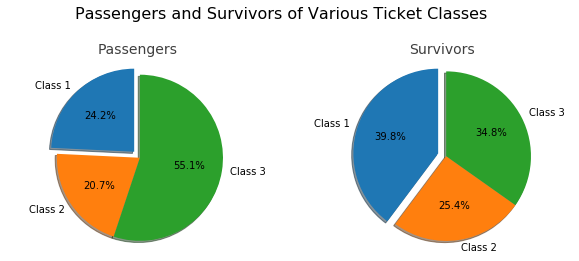

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Class ' + Pclass_passengers_df['Pclass'].astype(str)
pie1_sizes = Pclass_passengers_df['passengers'] 
pie2_sizes = Pclass_passengers_df['survivors']
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

f, (pie1, pie2) = plt.subplots(1, 2, figsize=(10, 3.5))
plt.suptitle('Passengers and Survivors of Various Ticket Classes', y=1.09, fontsize=16)

pie1.pie(pie1_sizes, explode=explode, labels=labels, autopct='%1.1f%%',\
        shadow=True, startangle=90)
pie1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pie1.set_title("Passengers", fontsize=14, alpha=0.75)

pie2.pie(pie2_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
pie2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pie2.set_title("Survivors", fontsize=14, alpha=0.75)

**Observation(s):** Pie chart illustrates that while Class 1 passengers accounted for 24.2% of all passengers, 39.8% of all survivors were from Class 1.

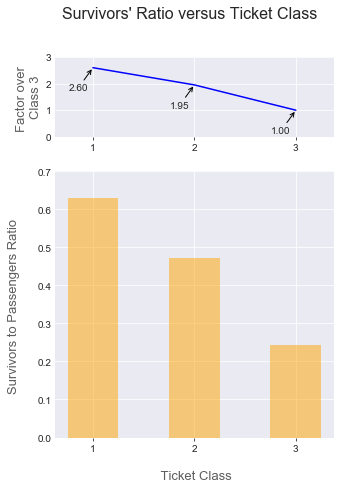

In [21]:
### Plot bar chart of survivors ratio within each Pclass & line chart normalized to 1st Class survivors' ratio.
# Create plot data.
x = Pclass_passengers_df['Pclass']
y1 = Pclass_passengers_df['survivors_ratio']
y2 = Pclass_passengers_df['survivors_ratio']/min(Pclass_passengers_df['survivors_ratio'])
y2_label = ['%.2f' % elem for elem in y2] # Rounds each number in 'y2' to 2 decimal places for labelling line chart.

# Set the overall chart style.
sns.set_style("darkgrid", {'xtick.major.size': 3.0})

# Create the figure.
f = plt.figure(figsize=(5,7))
f.suptitle('Survivors\' Ratio versus Ticket Class', fontsize=16.0)

# Create the gridspec.
gs = gridspec.GridSpec(2,1, height_ratios=[0.3, 1], width_ratios=[1])

# Plot the bar chart of survivors' ratio within each Class.
ax1 = plt.subplot(gs[1, :])  # Place the 1st plot on grid
ax1.bar(x, y1, color='orange', alpha=0.5, width=0.5)
ax1.set_ylim([0,0.7])
ax1.set_xlabel('\n Ticket Class', fontsize=13, alpha=0.75)
ax1.set_ylabel('Survivors to Passengers Ratio \n', fontsize=13, alpha=0.75)
ax1.set_xticks(x)

# Plot the line chart of survivability factor over Class 3's survivor's ratio. 
ax2 = plt.subplot(gs[0, :], sharex=ax1)
ax2.plot(x, y2, color='blue', alpha=1)
ax2.set_ylim([0,3.0])
ax2.set_xlabel('')
ax2.set_ylabel('Factor over \nClass 3', fontsize=13, alpha=0.75)

for label, x, y in zip(y2_label, x, y2):
    ax2.annotate(
        label,
        xy=(x, y), xytext=(-5, -25),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Set the tick size on x-axis for visibility.
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)

# Gridspec code inspired by http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html

**Observation(s):** 
1. Highest survival rate was from 1st class cabin where 62.9% of passengers in that class survived, followed by 2nd class cabin at 47.2%. Only 24.4% of 3rd class cabin passengers survived. 
2. Survival rate of 1st class passengers was almost 2.6 times that of passengers in 3rd class.
3. Survival rate of 2nd class passengers was close to 2 times that of passengers in 3rd class.

With the notably higher chance for survival for 1st class passengers versus 3rd class passengers, one wonders what the price was to procure a 1st class ticket and how did that compare to 3rd class ticket fare?

<a id='fares pclass'></a>
### 3.3 Ticket Prices between Pclass

In [22]:
Pclass_price = titanic_df.groupby('Pclass')['Fare'].describe()
Pclass_price

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [23]:
# Look at the factor of average 1st class ticket prices versus 2nd and 3rd.
print "Price ratio of 1st vs 3rd: {}".format(Pclass_price.loc[1]['mean'] / Pclass_price.loc[3]['mean'])
print "Price ratio of 1st vs 3rd: {}".format(Pclass_price.loc[1]['mean'] / Pclass_price.loc[2]['mean'])

Price ratio of 1st vs 3rd: 6.15366013604
Price ratio of 1st vs 3rd: 4.07288459696


In [24]:
# Compare the IQR of classes.
Pclass_price['75%'] - Pclass_price['25%']

Pclass
1    62.57605
2    13.00000
3     7.75000
dtype: float64

In [25]:
# Look at the % of 1st SD price over mean price of classes.
Pclass_price['std'] / Pclass_price['mean'] * 100

Pclass
1    93.138451
2    64.936985
3    86.125542
dtype: float64

**Observation(s) on Pclass fare difference:**
1. 1st class average fare is 6 times higher than the average fare for 3rd class.
2. 1st class average fare is 4 times higher than the average fare for 2rd class.
3. 1st class fares has the highest IQR, indicating a large spread between ticket prices within 1st class itself.
4. Perhaps it is understandable that since mean price on 1st class was already high at USD 84.15, the IQR would also be large compared to other classes. Taking an alternative view on the price spread, 1st class tickets has a standard deviation of USD 78.38 for a mean price of USD 84.15. Standard deviation is slightly over 93% of the mean price level, and is the highest among ticket classes.

Considering the spread of 1st class ticket price was large, is there a correlation between the different fare ranges in 1st class and the survivors from that class?

<a id='1st class passengers'></a>
### 3.4 Survivability amongst 1st Class Passengers
#### 3.4.1 Plot of Ticket Price Range of 1st Class

In [26]:
class1_df = titanic_df.groupby('Pclass').get_group(1)
class1_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [27]:
# Check the new DataFrame is correct.
class1_df['Fare'].describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

**Observation(s):** The new *class1_df* DataFrame has metrics consistent with earlier findings. 

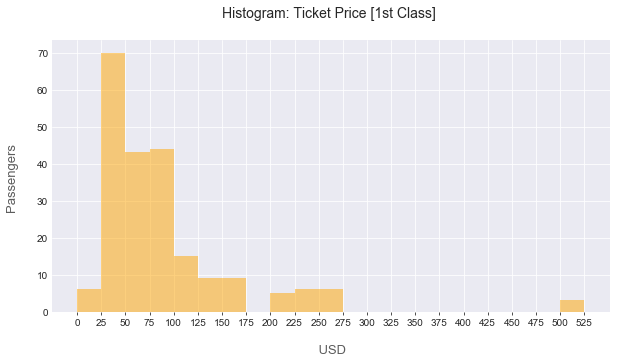

In [28]:
### Plot a histogram to illustrate the price spread.
# Prepare the data.
x = class1_df['Fare']
binsize = 25  # Set bin size at USD25 per bin.
binIndex = np.arange(0, max(x)+binsize, binsize)  

# Set the overall chart style.
sns.set_style("darkgrid", {'xtick.major.size': 3.0})
plt.figure(figsize=(10,5))

# Plot and label the data.
plt.hist(x, color=['orange'], bins=binIndex, label='', alpha=0.5)
plt.title('Histogram: Ticket Price [1st Class] \n', fontsize=14)
plt.xlabel('\n USD', fontsize=13, alpha=0.75)
plt.xticks(binIndex)
plt.ylabel('Passengers \n', fontsize=13, alpha=0.75)
#plt.legend(fontsize=12)

# Set the tick size on x-axis for visibility.
plt.tick_params(labelsize=10)

**Observation(s):** The histogram illustrates a broad spread of price levels for 1st class tickets.

Was there a trend on survivability amongst 1st class passengers with different price levels?

#### 3.4.2  Correlation between Survivors and 1st Class Ticket Fares
The ambition here is to quickly explore the dataset and see if a trend could be observed. A detailed statistical study if warranted, could be taken up as a separate project. 

The approach taken to investigate a trend is as follows:
1. Carve up the price to different ranges of in steps of 0.25SD.
2. Limit the binning up to statistical definition for outlier of 1.5 x IQR.
3. Illustrate the survivor versus passenger counts within each bin.

In [29]:
### Categorize fares & count number of survivors in 1st class.
# STEP 1: Built a series with data on survivors, non-survivors and the fares paid.
sur_fares, xsur_fares = split_by_survived(class1_df, 'Fare')

# STEP 2: Establish IQR and standard deviation for data 1st Class fares 
fares_IQR = class1_df['Fare'].quantile(q=0.75) - class1_df['Fare'].quantile(q=0.25)
fares_SD = class1_df['Fare'].std(ddof=0)  # Treating dataset as population instead of sample: ddof=0.

# STEP 3: Establish outliers i.e. Q1 - 1.5(IQR) and Q3 + 1.5(IQR) for lower and upper bins
lowerbin = class1_df['Fare'].quantile(q=0.25) - 1.5*fares_IQR
upperbin = class1_df['Fare'].quantile(q=0.75) + 1.5*fares_IQR
print "Lower bin value = {}; Upper bin value = {}".format(lowerbin, upperbin)

# STEP 4: Create the bin, bin the data and build histogram
binIndex = []

x = 0  # Bin indexes to start from zero instead of lowerbin which is a -ve value.
while x < upperbin:  
    binIndex.append(x)
    x += 0.25*fares_SD
binIndex.append(upperbin)  # Appends the upperbin value as the final bin.

Lower bin value = -62.940125; Upper bin value = 187.364075


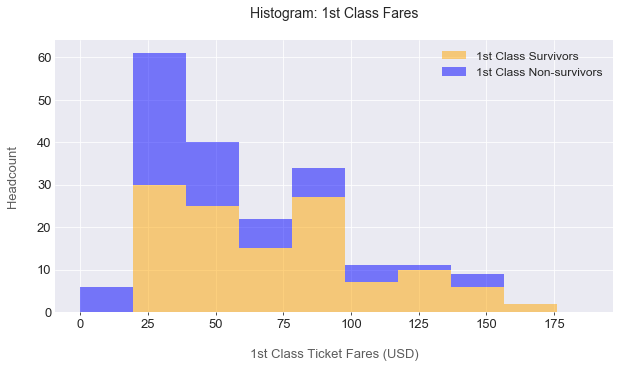

In [30]:
### Plot the histogram.
# Set the overall chart style.
sns.set_style("darkgrid", {'xtick.major.size': 3.0})
plt.figure(figsize=(10,5))

# Plot and label the data.
plt.hist([sur_fares, xsur_fares], bins=binIndex, \
         label = ['1st Class Survivors', '1st Class Non-survivors'], color=['orange','blue'], alpha=0.5, stacked=1)
plt.title('Histogram: 1st Class Fares\n', fontsize=14)
plt.xlabel('\n1st Class Ticket Fares (USD)', fontsize=13, alpha=0.75)
plt.ylabel('Headcount\n', fontsize=13, alpha=0.75)
plt.legend(fontsize=12)

# Set the tick size on x-axis for visibility.
plt.tick_params(labelsize=13)

**Observation(s):** Rate of survival appears higher with increasing fares among 1st class tickets.

*Follow-on Question:* What is the % of survivors among the different fare bins? 

In [31]:
# Group Class 1 passenger's and survivor's fares into bins
binned_fares = pd.cut(class1_df['Fare'], bins=binIndex, labels=binIndex[1:])
binned_sur_fares = pd.cut(sur_fares, bins=binIndex, labels=binIndex[1:])

# Count the occurance within each bin
ratio = binned_sur_fares.value_counts()/binned_fares.value_counts()
ratio = ratio.sort_index().reset_index()

In [32]:
ratio

,index,Fare
0,19.549682,0.000000
1,39.099363,0.491803
2,58.649045,0.625000
3,78.198726,0.681818
4,97.748408,0.794118
5,117.298089,0.636364
6,136.847771,0.909091
7,156.397452,0.666667
8,175.947134,1.000000
9,187.364075,NaN


In [33]:
### Plot the bar chart to illustrate.
# Prepare data for plotting.
x = ratio.index
y = ratio['Fare']

# x-axis Ticker Labels: Get values for the x tickers label e.g. 'x0-x1'
from_x = ['%.2f' % elem for elem in ratio['index'].shift(1)]
from_x[0] = '0'  # Reassigns 'nan' value from shift() operation with '0'
to_x = ['%.2f' % elem for elem in ratio['index']]

# x-axis Ticker Labels: Loop through to create wanted format and store in list.
xticklabels = []
for foo in range(len(from_x)):
    label = from_x[foo] + " - " + to_x[foo]
    xticklabels.append(label)
print xticklabels

['0 - 19.55', '19.55 - 39.10', '39.10 - 58.65', '58.65 - 78.20', '78.20 - 97.75', '97.75 - 117.30', '117.30 - 136.85', '136.85 - 156.40', '156.40 - 175.95', '175.95 - 187.36']


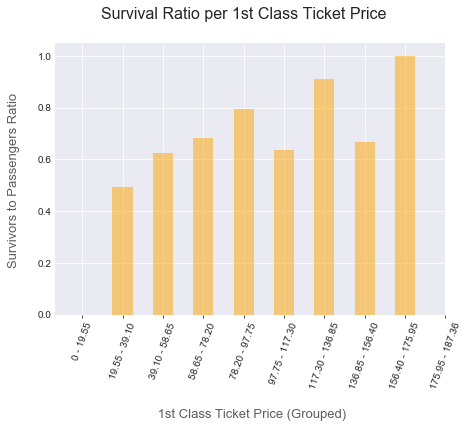

In [34]:
# Set the grid.
sns.set_style("darkgrid", {'xtick.major.size': 3.0})

# Create the figure.
f = plt.figure(figsize=(7,5))
f.suptitle('Survival Ratio per 1st Class Ticket Price', fontsize=16.0)

# Plot the bar chart of survivors' ratio within each Class.
#ax1 = plt.subplot(gs[0, 0])  # Place the 1st plot on grid
ax1 = plt.subplot()
ax1.bar(x, y, color='orange', alpha=0.5, width=0.5)
ax1.set_xlabel('\n 1st Class Ticket Price (Grouped)', fontsize=13, alpha=0.75)
ax1.set_ylabel('Survivors to Passengers Ratio \n', fontsize=13, alpha=0.75)
ax1.set_xticks(x)
ax1.set_xticklabels(xticklabels, rotation=70)

**Observation(s):** A pattern exists to suggest that higher fares for 1st Class tickets increases survivability.

### Conclusion: Survivability based on Pclass
There is notable trend that survival rate for passengers who boarded with 1st Class tickets was higher compared to passengers of 2nd Class and 3rd Class tickets. 

Within 1st Class, there was a broad spread of fare prices. When compared against survivors within this class, there appears a trend to suggest that survival rate among 1st Class passengers increases with ticket price. Analysis to explore this trend could be performed in a separate project.

<a id='age'></a>
### 3.5 Survivability: Age

In [35]:
# Stats on age and survivors.
titanic_a['Age'].describe()  #DataFrame 'titanic_a' is the cleaned of missing 'Age' entries.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
titanic_a.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [62]:
290/(290+424.0)

0.4061624649859944

**Observation(s):** 
1. Mean age of passengers is 29.7 years.
2. On the other hand, mean age of survivors is 28.3 years - indicating that survivors are on average younger.
3. 40.6% of passengers survived based on a dataset adjusted for the missing *Age* entries.

How does this look like across the different age groups?

In [37]:
### Plot a histogram to see how survivors differ across age groups.
# Split DataFrame into columns containing ages of survivors and non-survivors.
s_age, xs_age = split_by_survived(titanic_a, 'Age')

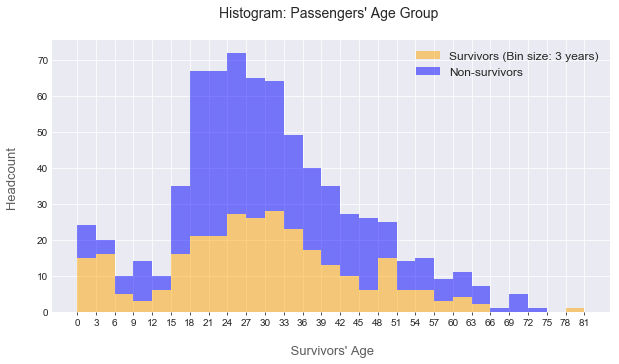

In [38]:
# Prepare charting data for age of survivors, non-survivors. 
s1 = s_age
s2 = xs_age
binsize = 3  # Set bin size at 3 years per bin.
binIndex = np.arange(0, max(titanic_a['Age'])+binsize, binsize)  

# Set the overall chart style.
sns.set_style("darkgrid", {'xtick.major.size': 3.0})
plt.figure(figsize=(10,5))

# Plot and label the data.
plt.hist([s1, s2], color=['orange', 'blue'], bins=binIndex, \
         label=['Survivors (Bin size: 3 years)','Non-survivors'], alpha=0.5, stacked=1)
plt.title('Histogram: Passengers\' Age Group \n', fontsize=14)
plt.xlabel('\n Survivors\' Age', fontsize=13, alpha=0.75)
plt.xticks(binIndex)
plt.ylabel('Headcount \n', fontsize=13, alpha=0.75)
plt.legend(fontsize=12)


# Set the tick size on x-axis for visibility.
plt.tick_params(labelsize=10)

**Observation(s):**
1. The dataset contains passenger manifest with average age of 29.7 years. 
2. Survivors tended to be younger at average of 28.3 years, while non-survivors tended to be older at average of 30.6 years.
3. Observed from chart:
  * Survival rate from 0 - 18 years appears higher (with at least 50% survival rate)
  * Exception appears in age group 9 - 12 years, where survival rate is low at approximately 33%.
  * Survival rate from 18 years is less than 50% with exception of age group 48 - 51 having approximate rate of 50%.

In [39]:
### Examining children survival vs adult survival
# Group child passengers (i.e. passengers of age 0 - 12 inclusive)
child_df = titanic_a[titanic_a['Age'] <= 12.0]
adult_df = titanic_a[titanic_a['Age'] > 12.0]

In [40]:
# Stats for child survivors
child_df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,29.0,6.00000,3.555680,1.00,2.0,7.0,9.0,11.0
1,40.0,3.87925,3.004404,0.42,1.0,3.5,5.0,12.0


In [41]:
# Stats for adult survivors
adult_df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,395.0,32.434177,12.915853,14.0,22.00,29.0,40.0,74.0
1,250.0,32.258000,12.103571,13.0,23.25,30.0,39.0,80.0


In [42]:
adult_df.groupby('Survived')['Age'].describe().iloc[1,0]/adult_df['Age'].count()

0.38759689922480622

In [43]:
child_df.groupby('Survived')['Age'].describe().iloc[1,0]/child_df['Age'].count()

0.57971014492753625

**Observation(s):** 58% of child passengers survived compared to 38.8% survival in adults passengers.

### Conclusion: Survivability based on Age
1. The dataset contains passenger manifest with average age of 29.7 years. 
2. Survivors tended to be younger at average of 28.3 years, while non-survivors tended to be older at average of 30.6 years.
3. Chart "Histogram: Passengers' Age Group" shows a double-peaked normal distribution pattern.
4. New datasets are created to represent children and adult passengers, where children are up to 12 years old.
5. Average age of adult passengers is 32.4 years while child passengers average age is 4.8 years.
  * Average age of child survivors is 3.9
  * Average age of adult survivors is 32.3
6. Child passengers had a higher survival rate of 58% compared to adult passengers with 38.8%.

<a id='sex'></a>
### 3.6 Survivability: Gender

In [44]:
titanic_df.groupby(['Sex']).describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


**Observation(s):** Female passengers had higher survival rate at 74.2%, while male passengers had a survival rate of 18.9%.

How does this look when taking into account the age groups of each gender?

In [45]:
### Build dataframes to contain data for histograms of male and female survivors across age.
# Dataframes of boy and girl survivors.
child_gender = split_by_survived(child_df, ['Age', 'Sex'])
sur = child_gender[0]
boy_sur_df = sur[sur['Sex']=='male']
girl_sur_df = sur[sur['Sex']=='female']

# Dataframes of man and woman suvivors
adult_gender = split_by_survived(adult_df, ['Age', 'Sex'])
sur = adult_gender[0]
man_sur_df = sur[sur['Sex']=='male']
woman_sur_df = sur[sur['Sex']=='female']

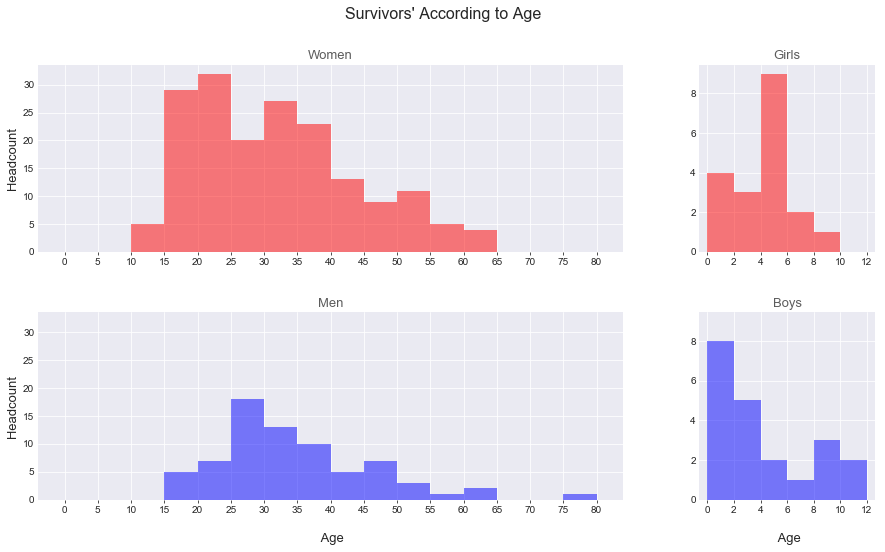

In [46]:
### Plot bar chart of survivors ratio within each Pclass & line chart normalized to 1st Class survivors' ratio.
# Create plot data.
boy = boy_sur_df['Age']
girl = girl_sur_df['Age']
man = man_sur_df['Age']
woman = woman_sur_df['Age']
child_binsize = 2  # Child age binned in steps of 2 years.
adult_binsize = 5  # Adult age binned in steps of 5 years.
child_binIndex = np.arange(0, max(child_df['Age'])+child_binsize, child_binsize)  
adult_binIndex = np.arange(0, max(adult_df['Age'])+adult_binsize, adult_binsize)  

# Set the overall chart style.
sns.set_style("darkgrid", {'xtick.major.size': 3.0})

# Create the figure.
f = plt.figure(figsize=(15, 8))
f.suptitle('Survivors\' According to Age', fontsize=16.0)

# Create the gridspec.
gs = gridspec.GridSpec(3,2, height_ratios=[1, 0.05 ,1], width_ratios=[1, 0.3])
# 3 rows created instead of 2. 1st and 3rd rows for charts, while 2nd row as spacer between charts.

# Plot for woman
ax00 = plt.subplot(gs[0, 0])  # Place the 1st plot on grid
ax00.hist(woman, bins=adult_binIndex, color='red', alpha=0.5)
ax00.set_title('Women', fontsize=13, alpha=0.75)
#ax00.set_ylim([0,3.0])
#ax00.set_xlabel('\n Age', fontsize=13, alpha=0.75)
ax00.set_ylabel('Headcount', fontsize=13, alpha=1)
ax00.set_xticks(adult_binIndex)

# Plot for man
ax10 = plt.subplot(gs[2, 0], sharex=ax00, sharey=ax00)
ax10.hist(man, bins=adult_binIndex, color='blue', alpha=0.5)
ax10.set_title('Men', fontsize=13, alpha=0.75)
#ax10.set_ylim([0,3.0])
ax10.set_xlabel('\n Age', fontsize=13, alpha=1)
ax10.set_ylabel('Headcount', fontsize=13, alpha=1)

# Plot for girl
ax01 = plt.subplot(gs[0, 1])
ax01.hist(girl, bins=child_binIndex, color='red', alpha=0.5)
ax01.set_title('Girls', fontsize=13, alpha=0.75)
#ax01.set_ylim([0,3.0])
#ax01.set_xlabel('\n Age', fontsize=13, alpha=0.75)
#ax01.set_ylabel('Headcount', fontsize=13, alpha=0.75)
ax01.set_xticks(child_binIndex)

# Plot for boy
ax11 = plt.subplot(gs[2, 1], sharey=ax01, sharex=ax01)
ax11.hist(boy, bins=child_binIndex, color='blue', alpha=0.5)
ax11.set_title('Boys', fontsize=13, alpha=0.75)
#ax11.set_ylim([0,3.0])
ax11.set_xlabel('\n Age', fontsize=13, alpha=1)
#ax11.set_ylabel('Headcount', fontsize=13, alpha=0.75)
#ax11.set_xticks(child_binIndex)

# Set the tick size on x-axis for visibility.
ax00.tick_params(labelsize=10)
ax01.tick_params(labelsize=10)
ax10.tick_params(labelsize=10)
ax11.tick_params(labelsize=10)

# Gridspec code inspired by http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html

**Observation(s):** 
1. The distribution of survivors for women and men across the agess are similar. 
2. However, there is a clear distinction between women and men survivor count, where men survivors were markedly fewer than women. 
3. When it comes to children, the charts indicate that boys and girls survivors are similar in count.


In [47]:
# Adult survivors according to gender.
print "Man survivors =", man_sur_df['Age'].count()
print "Woman survivors =", woman_sur_df['Age'].count()

Man survivors = 72
Woman survivors = 178


In [48]:
# Adult non-survivors according to gender.
adult_xsur_cnt = adult_gender[1].groupby('Sex')['Age'].count()
adult_xsur_cnt

Sex
female     51
male      344
Name: Age, dtype: int64

In [49]:
print "Men survivors:non-survivors ratio = ", man_sur_df['Age'].count() / adult_xsur_cnt['male'].astype(float)
print "Women survivors:non-survivors ratio = ", woman_sur_df['Age'].count() / adult_xsur_cnt['female'].astype(float)

Men survivors:non-survivors ratio =  0.209302325581
Women survivors:non-survivors ratio =  3.49019607843


**Observation(s):** For every 10 men who did not survive, 2 men did. In contrast, for every woman that did not survive, almost 3.5 women did. Survivability of adult female was substantially higher.

In [50]:
# Child survivors according to gender.
print "Boy survivors =", boy_sur_df['Age'].count()
print "Girl survivors =", girl_sur_df['Age'].count()

Boy survivors = 21
Girl survivors = 19


In [51]:
# Child non-survivors according to gender.
child_xsur_cnt = child_gender[1].groupby('Sex')['Age'].count()
child_xsur_cnt

Sex
female    13
male      16
Name: Age, dtype: int64

In [52]:
print "Boy survivors:non-survivors ratio = ", boy_sur_df['Age'].count() / child_xsur_cnt['male'].astype(float)
print "Girl survivors:non-survivors ratio = ", girl_sur_df['Age'].count() / child_xsur_cnt['female'].astype(float)

Boy survivors:non-survivors ratio =  1.3125
Girl survivors:non-survivors ratio =  1.46153846154


**Observation(s):** 
1. The printouts supports observations from charts indicating that boys and girls survivors are similar in count.
2. Girls edged boys on survival rate with a 1.46 survivors:non-survivors ratio (compared to 1.31 for boys).

<a id='embarked'></a>
### 3.6 Survivability: Boarding Station
Did survivors differ between passengers who boarded from different ports?

In [53]:
titanic_df.groupby('Embarked')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


**Observation(s):** 
1. It appears there is a noticeably higher proportion of survivors amongst passengers embarking from Cherbourg. 

*Follow-on Question(s):*
1. Were there more female passengers from Cherbourg, contributing to the higher survivors rate?
2. [OR] What are the count of male and female passengers boarding from each port?

In [54]:
titanic_df.groupby(['Embarked','Sex'])['Survived'].describe()

count      mean       std  min   25%  50%  75%  max
Embarked Sex                                                        
C        female   73.0  0.876712  0.331042  0.0  1.00  1.0  1.0  1.0
         male     95.0  0.305263  0.462962  0.0  0.00  0.0  1.0  1.0
Q        female   36.0  0.750000  0.439155  0.0  0.75  1.0  1.0  1.0
         male     41.0  0.073171  0.263652  0.0  0.00  0.0  0.0  1.0
S        female  203.0  0.689655  0.463778  0.0  0.00  1.0  1.0  1.0
         male    441.0  0.174603  0.380058  0.0  0.00  0.0  0.0  1.0

**Observation(s):** 
1. Passengers embarking from Cherbourg port had the highest proportion of survivors; with 55.36% of passengers having survived the wreck.
2. This was followed at a distant second by passengers from Queenstown at 38.96% and passengers from Southampton at 33.70%.
3. Correspondingly, both female and male passengesrs from Cherbourg had the highest proportion of survivors:-
  * 87.67% of female passengers survived
  * 30.53% of male passengers survived (noteably higher than overall male passengers survivor rate of 18.89%)
  
*Follow-on Question(s):*
1. Which class did passengers from Cherbourg occupy?

In [55]:
titanic_df.groupby(['Embarked', 'Pclass'])['Survived'].describe()

count      mean       std  min   25%  50%   75%  max
Embarked Pclass                                                      
C        1        85.0  0.694118  0.463515  0.0  0.00  1.0  1.00  1.0
         2        17.0  0.529412  0.514496  0.0  0.00  1.0  1.00  1.0
         3        66.0  0.378788  0.488802  0.0  0.00  0.0  1.00  1.0
Q        1         2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
         2         3.0  0.666667  0.577350  0.0  0.50  1.0  1.00  1.0
         3        72.0  0.375000  0.487520  0.0  0.00  0.0  1.00  1.0
S        1       127.0  0.582677  0.495070  0.0  0.00  1.0  1.00  1.0
         2       164.0  0.463415  0.500187  0.0  0.00  0.0  1.00  1.0
         3       353.0  0.189802  0.392701  0.0  0.00  0.0  0.00  1.0

**Observation(s):** A notable proportion of Cherbourg passengers had 1st class tickets (i.e. 85 over 168) compared to passengers from the other 2 ports.

In [56]:
# Cherbourg
grpby_ports = titanic_df.groupby('Embarked')
cherbourg_df = grpby_ports.get_group('C')
cherbourg_sur, cherbourg_xsur = split_by_survived(cherbourg_df, 'Pclass')

# Queenstown
queenstown_df = grpby_ports.get_group('Q')
queenstown_sur, queenstown_xsur = split_by_survived(queenstown_df, 'Pclass')

#Southampton
southampton_df = grpby_ports.get_group('S')
southampton_sur, southampton_xsur = split_by_survived(southampton_df, 'Pclass')

In [57]:
# Produce axes values for sub-plots by counting occurence of Pclass values.
cherbourg_s1 = cherbourg_sur.value_counts()
cherbourg_s0 = cherbourg_xsur.value_counts()
queenstown_s1 = queenstown_sur.value_counts()
queenstown_s0 = queenstown_xsur.value_counts()
southampton_s1 = southampton_sur.value_counts()
southampton_s0 = southampton_xsur.value_counts()

print(cherbourg_s1)
print(southampton_s0)

1    59
3    25
2     9
Name: Pclass, dtype: int64
3    286
2     88
1     53
Name: Pclass, dtype: int64


In [58]:
# Create DataFrame for plotting.
port_Pclass_df = pd.DataFrame({'cherbourg_s': cherbourg_s1, 'cherbourg_ns': cherbourg_s0,
                               'queenstown_s': queenstown_s1, 'queenstown_ns': queenstown_s0,
                               'southampton_s': southampton_s1, 'southampton_ns': southampton_s0
                              }).reset_index()
port_Pclass_df

,index,cherbourg_ns,cherbourg_s,queenstown_ns,queenstown_s,southampton_ns,southampton_s
0,1,26,59,1,1,53,74
1,2,8,9,1,2,88,76
2,3,41,25,45,27,286,67


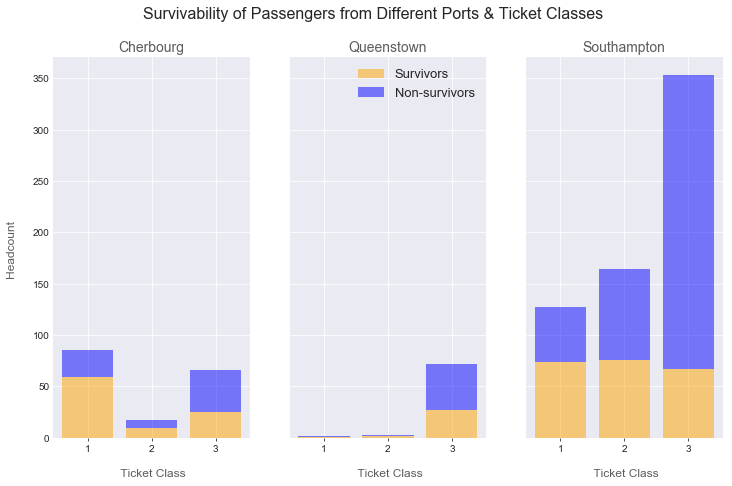

In [59]:
### Subplots of 'Embarked' ports where each plot charts survivors & non-survivors across 'Pclass'.
# Set the overall chart style.
sns.set_style("darkgrid", {'xtick.major.size': 3.0})

# Create subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,7))
plt.suptitle('Survivability of Passengers from Different Ports & Ticket Classes  \n', fontsize=16)

ax1.bar(port_Pclass_df['index'], port_Pclass_df['cherbourg_s'], color='orange', alpha=0.5)
ax1.bar(port_Pclass_df['index'], port_Pclass_df['cherbourg_ns'], bottom=port_Pclass_df['cherbourg_s'], color='blue', alpha=0.5)
ax1.set_title("Cherbourg", fontsize=14, alpha=0.75)
ax1.set_xlabel('\n Ticket Class', fontsize=12, alpha=0.75)
ax1.set_ylabel('Headcount \n', fontsize=12, alpha=0.75)

ax2.bar(port_Pclass_df['index'], port_Pclass_df['queenstown_s'], color='orange', alpha=0.5)
ax2.bar(port_Pclass_df['index'], port_Pclass_df['queenstown_ns'], bottom=port_Pclass_df['queenstown_s'], color='blue', alpha=0.5)
ax2.set_title("Queenstown", fontsize=14, alpha=0.75)
ax2.set_xlabel('\n Ticket Class', fontsize=12, alpha=0.75)
ax2.legend(["Survivors", "Non-survivors"], fontsize=13)  # Place legend for subplots.

ax3.bar(port_Pclass_df['index'], port_Pclass_df['southampton_s'], color='orange', alpha=0.5)
ax3.bar(port_Pclass_df['index'], port_Pclass_df['southampton_ns'], bottom=port_Pclass_df['southampton_s'], color='blue', alpha=0.5)
ax3.set_title("Southampton", fontsize=14, alpha=0.75)
ax3.set_xlabel('\n Ticket Class', fontsize=12, alpha=0.75)

# Set the tick size on x-axis for visibility.
plt.tick_params(labelsize=10)

**Observation(s):**
1. Cherbourg passengers had the highest survival rate among the three ports, and this leading survival rate cuts across all 3 ticket classes.
2. 51.45% of passengers from Cherbourg bought 1st class tickets; suggesting that Cherbourg could have been a city of affluent residents.
3. Southampton had the largest representation of passengers across each `Pclass`, but had the lowest proportion of survivors among the ports.

<a id='conclusions'></a>
## 4 Conclusions

This project tries to answer the question of what factors made poeple more likely to survive the Titanic disaster by analyzing the 4 independent variables and providing metrices and plots to support observations on if and how these variables affect survivability (dependent variable). 
1. Pclass (A proxy for socio-economic status)
2. Age
3. Gender
4. Embarkation port

**Pclass** appears to have an influence on survivability considering 62.9% of passengers from Class 1 survived compared to 47.2% from Class 2 and 24.4% from Class 3. While 24.2% of all passengers were in Class 1, 39.8% of all survivors were from Class 1. Contrasting this with Class 3 passsengers who represented 55.1% of all passengers, but had only 34.8% of survivors.

Class 1 survival rate was 2.6 times that of Class 3, and Class 2 survival rate was close to 2 times that of Class 3.

How did ticket prices of Class 1 compare to other classes, considering the lead it had in survival rate? Class 1 average fares were over 6 times higher than the average fare for 3rd class, and 4 times higher than 2nd class's average fare. Even within Class 1 tickets, there were a wide spread of fare prices; and it was noted that higher ticket prices tended to lead to increased survival rates.

**Age** appears to have an influence on survival rates in terms of 2 age groups: child and adult. A child has been categorized as a passenger aged 12 years and below. While the blended survival rate was at 40.6%, categorizing the passengers into the 2 age groups saw a notably higher children survival rate of 58% compared to 38.8% for adults.

**Gender** also appears to have an influence on survivability. 74.2% of female passengers survived compared to 18.8% of male passengers. The difference in survival rate is more pronounced in adults between genders where more women survived compared to men. For every 10 women who did not survive, 35 others did. In contrast, for every 10 men who did not survive, only 2 others did. Survival rates of boys and girls were similar, with girls have a slight edge over boys.

**Embarkation port** seems to have influenced survivability. Cherbourg saw the highest percentage of survivors at 55.36%, followed by Queenstown at 38.96% and Southampton at 33.70%. Survival rate of female passengers from Cherbourg  at 87.67% was higher compared to female passengers from other ports. Male passengers from Cherbourg also seemed to have bucked the trend with 30.52% survival rate.

Cherbourg by itself may not have contributed to the higher survival rate. It appears that 51.45% of passengers from Cherbourg bought 1st class tickets, the highest percentage of 1st class passengers across the ports. Strangely,  Cherbourg's 2nd and 3rd class passengers had higher survival rate compared to Southampton's passengers in the same classes. Could it be the composition of gender in Cherbourg's passengers that boosted survival rate of its passengers? 

Cherbourg had more male passengers compared to female passengers. For every female passenger from Cherbourg, there were 1.3 male passengers. So, the survival rate enjoyed by female passengers did not help boost survival rate of passengers from Cherbourg.

There could be other variables influencing the seemingly higher survival rate for passengers from Cherbourg such as cabin location that could be interesting for future exploration.

Despite the apparent correlation between the independent variables and survivability, one must recognize **limitations** with the results:
1. Only 1 sample of size 891 passengers has been used in the analysis.
2. Data on passengers' location during the crucial period of evacuation is not available. The observations were made with the assumption that all passengers had equal chance of being evacuated.
3. There was no distinction between paying passengers and working crews in the dataset - hence, it was assumed that every passenger had equal motivation of evacuating. 

